**Importing the Libraries**

In [8]:
os.getcwd()

'/home/dinesh/Downloads/Anemia-Detection'

In [5]:
!pip install matplotlib

In [9]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPool2D
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [10]:
!unzip new.zip

unzip:  cannot find or open new.zip, new.zip.zip or new.zip.ZIP.


**Importing the Dataset**

In [11]:
Categories = ["anemia" , "non-anemia"]              #the target categories of the datset

In [12]:
path = os.getcwd()

In [13]:
data_dir = path + '/Data/new/' 
data_dir

'/home/dinesh/Downloads/Anemia-Detection/Data/new/'

In [14]:
print(os.path.exists(data_dir))

True


In [15]:
data = []                                                         # iterating through the images path and appending the image and labels in data list
for category in Categories:
  path = os.path.join(data_dir,category)
  class_num = Categories.index(category)
  for img in os.listdir(path):
    img_arr = cv.imread(os.path.join(path,img))
    re = cv.resize(img_arr,(64,64))
    data.append([re,class_num])

In [16]:
np.random.shuffle(data)   #shuffling the data to provide randomization

In [17]:
x_data = []                    # iterating through the data list and append the images to x_data and labels to the y_data
y_data = []
for features,labels in data:
  x_data.append(features)
  y_data.append(labels)

In [18]:
x_data = np.array(x_data)       #converting the images and labels into numpy array
y_data = np.array(y_data)

In [19]:
print(f"shape of x data {x_data.shape}")
print(f"shape of y data {y_data.shape}")

shape of x data (4262, 64, 64, 3)
shape of y data (4262,)


In [20]:
x_data = x_data/255       #normalizing the pixels of the images

**Plotting the number of categories in the target variable**

**Plotting the random images from the dataset**

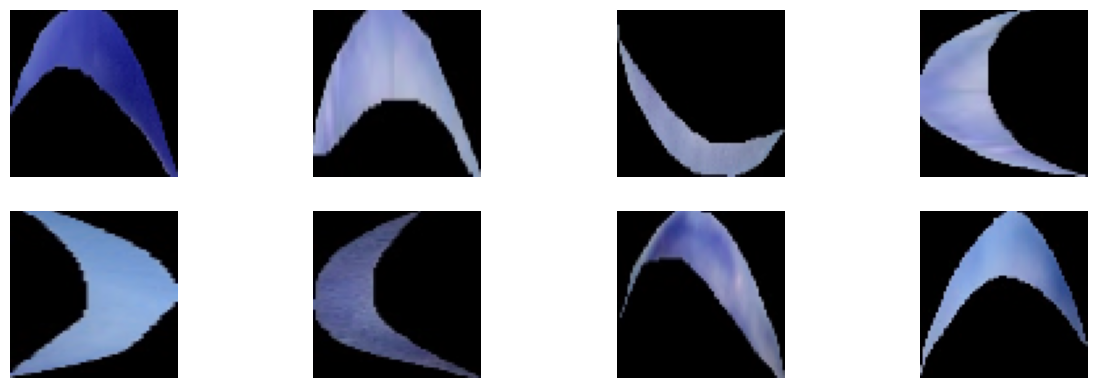

In [22]:
plt.figure(figsize=(15,10))
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.imshow(x_data[i],cmap='gray')
  plt.axis("off")

**Splitting the datset into Train and test**

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=22)

In [24]:
print(f"shape of x train {x_train.shape}")
print(f"shape of y train {y_train.shape}")
print(f"shape of x test {x_test.shape}")
print(f"shape of y train {y_test.shape}")

shape of x train (3409, 64, 64, 3)
shape of y train (3409,)
shape of x test (853, 64, 64, 3)
shape of y train (853,)


**Approach 1 using Convolutional Neural Networks**

In [25]:
model = Sequential()                      # creating a sequential cnn model
model.add(Conv2D(100 , (3,3) , input_shape=(64,64,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(150 , (3,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100 , activation="relu"))
model.add(Dense(2 , activation="sigmoid"))

2025-01-18 21:11:31.555884: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [26]:
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=20)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.5704 - loss: 0.7085 - val_accuracy: 0.6377 - val_loss: 0.6566
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.5989 - loss: 0.6672 - val_accuracy: 0.5522 - val_loss: 0.6779
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.6189 - loss: 0.6431 - val_accuracy: 0.6741 - val_loss: 0.6147
Epoch 4/20
154/171 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7108 - loss: 0.5744

In [53]:
model.summary()                #summary of the CNN model used for the classification

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 100)    │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 150)    │       135,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 29400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     2,940,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,234,758 (35.23 MB)

 Trainable params: 3,078,252 (11.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,156,506 (23.49 MB)

In [54]:
y_pred = model.predict(x_test)       #predicting the values using the testing data

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [55]:
print("the accuracy score for the model is " ,accuracy_score(y_test,y_pred.argmax(axis=1)))   

the accuracy score for the model is  0.9003516998827668


In [56]:
print(classification_report(y_test,y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       494
           1       0.90      0.86      0.88       359

    accuracy                           0.90       853
   macro avg       0.90      0.89      0.90       853
weighted avg       0.90      0.90      0.90       853



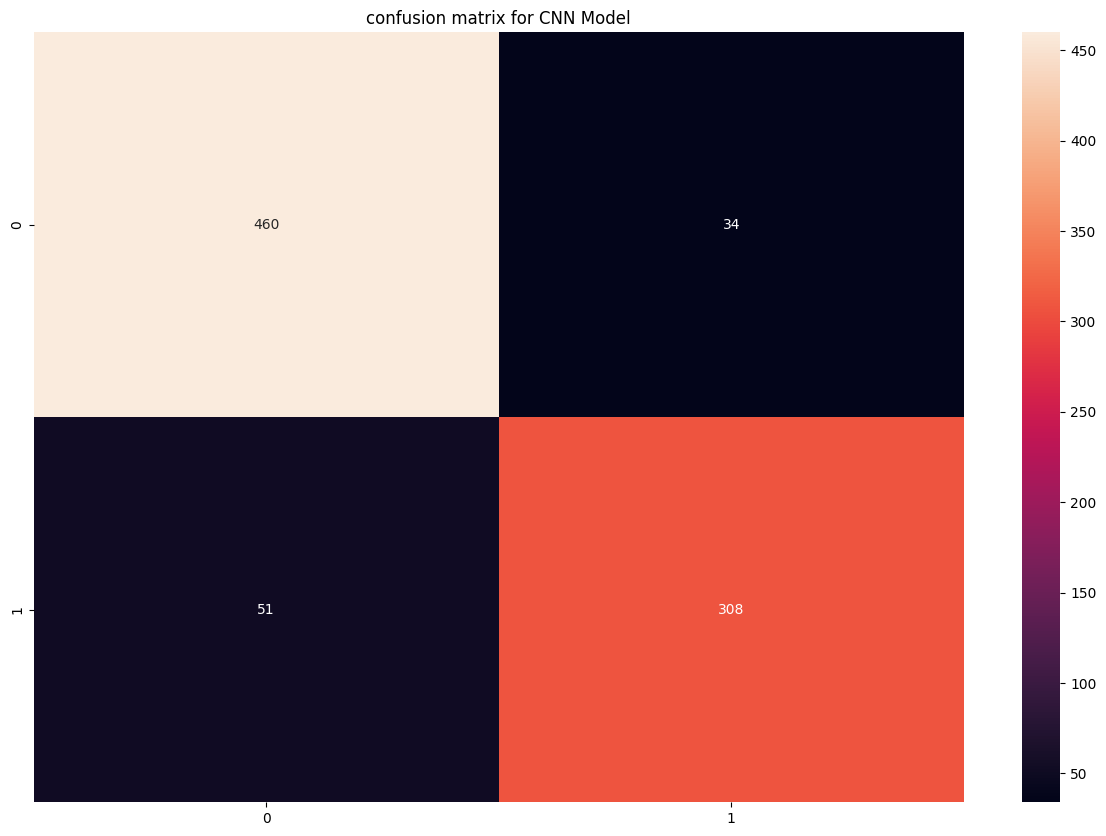

In [57]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_pred.argmax(axis=1)),annot=True,fmt='g')
plt.title("confusion matrix for CNN Model")
plt.show()

In [58]:
predictions = model.predict(x_test[0].reshape(1,64,64,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [60]:
model.save("anemia.keras")

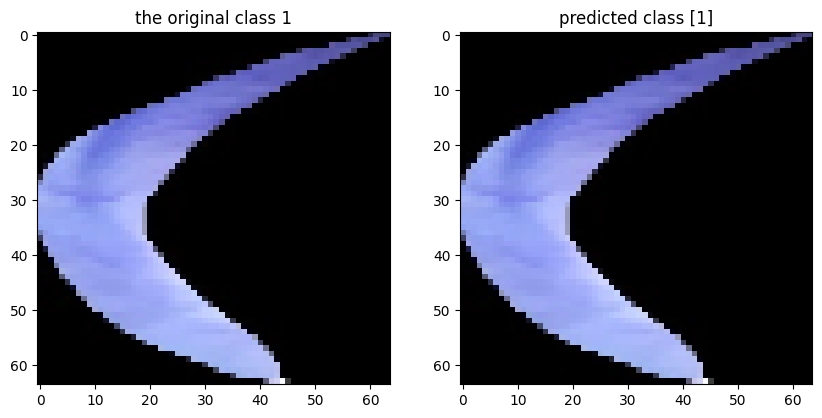

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"the original class {y_test[0]}")
plt.subplot(1,2,2)
plt.imshow(x_test[0])
plt.title(f"predicted class {predictions.argmax(axis=1)}")
plt.show()